# importing all the required library

In [1]:

from __future__ import print_function
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
plt.style.use("ggplot")

from skimage import io
from sklearn.cluster import KMeans

from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider
import ipywidgets as widgets

In [2]:
plt.rcParams['figure.figsize'] = (20, 12)

In [9]:
from google.colab import files
files.upload()

Saving plot_utils.py to plot_utils.py


{'plot_utils.py': b"import numpy as np\nimport matplotlib.pyplot as plt\n\nclass plot_utils:\n    def __init__(self, img_data, title, num_pixels=10000, colors=None):\n        self.img_data = img_data\n        self.title = title\n        self.num_pixels = num_pixels\n        self.colors = colors\n\n    def colorSpace(self):\n        if self.colors is None:\n            self.colors = self.img_data\n\n        rand = np.random.RandomState(42)\n        index = rand.permutation(self.img_data.shape[0])[:self.num_pixels]\n        colors = self.colors[index]\n        R, G, B = self.img_data[index].T\n        fig, ax = plt.subplots(1, 2, figsize=(12,8))\n        ax[0].scatter(R, G, color=colors, marker='.')\n        ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))\n        ax[1].scatter(R, B, color=colors, marker='.')\n        ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))\n        fig.suptitle(self.title, size=20)\n"}

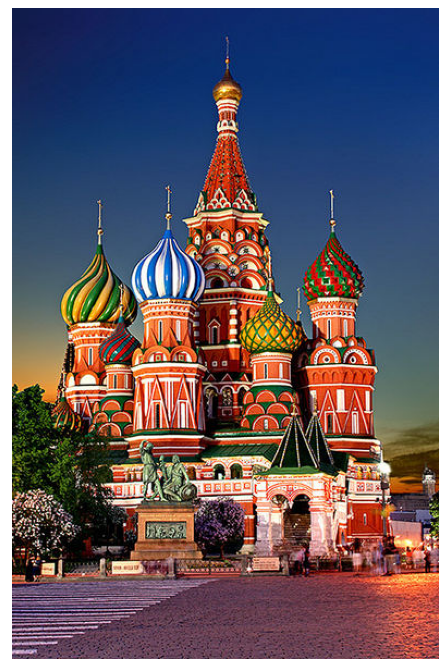

In [6]:
img = io.imread('1-Saint-Basils-Cathedral.jpg')
ax = plt.axes(xticks=[],yticks=[])
ax.imshow(img);

In [7]:
img.shape

(600, 394, 3)

In [8]:
#preprocessing the images 
img_data = (img/255.0).reshape(-1,3)
img_data.shape

(236400, 3)

In [10]:
from plot_utils import plot_utils

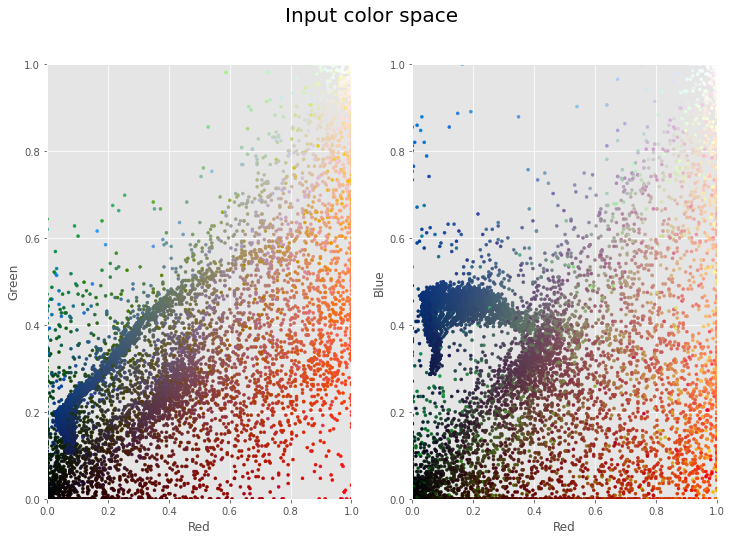

In [13]:
x = plot_utils(img_data,title="Input color space")
x.colorSpace()

**K-means Algorithm**:

1. Initialization: Randomly sample $k$ colors from the input image. These are the initial $k$ means $\mu_1,\mu_2,...,\mu_k$.


2. For each pixel in the image, assign it to its nearest mean given by $$c^{(i)} := \textrm{argmin}_{j}\left \|x^{(i)} - \mu_j \right \|^2$$


3. Update the means using the pixel assignments from Step 2. $$\mu_j := \frac{\sum_{i}^{n}1\left \{c^{(i)} = j  \right \}x^{(i)}}{\sum_{i}^{n}1\left \{c^{(i)} = j  \right \}}$$


4. Repeat Steps 2 and 3 until convergence.

In [15]:
from sklearn.cluster import MiniBatchKMeans

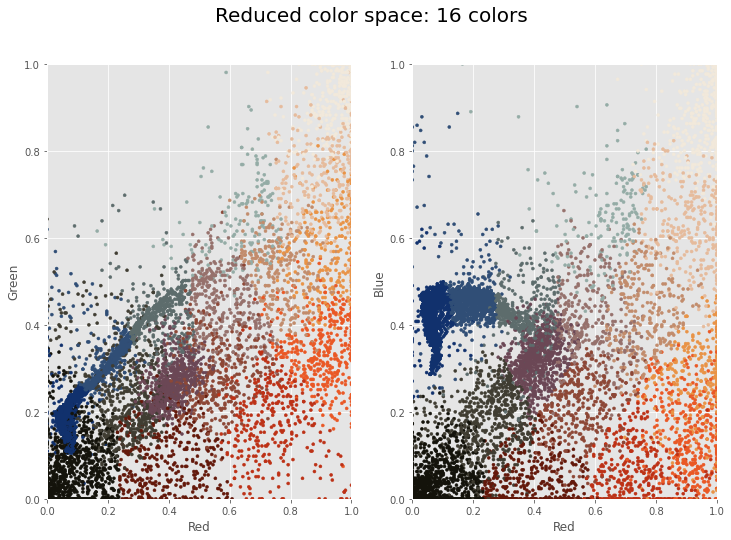

In [16]:
kmeans = MiniBatchKMeans(16).fit(img_data)
k_colors = kmeans.cluster_centers_[kmeans.predict(img_data)]

y = plot_utils(img_data, colors=k_colors, title="Reduced color space: 16 colors")
y.colorSpace()

# Interactive image compressiono dash board 




In [19]:
img_dir = ['1-Saint-Basils-Cathedral.jpg','3-peacock.jpg','4-GoldenGateBridge.jpg','2-new-york-skyline.jpg']

In [20]:
@interact
def color_compression(image=img_dir, k=IntSlider(min=1,max=256,step=1,value=16,
                                                             continuous_update=False,
                                                             layout=dict(width='100%'))):
    
    input_img = io.imread(image)
    img_data = (input_img / 255.0).reshape(-1, 3)
    
    kmeans = MiniBatchKMeans(k).fit(img_data)
    k_colors = kmeans.cluster_centers_[kmeans.predict(img_data)]
    #After K-means has converged, load the large image into your program and 
    #replace each of its pixels with the nearest of the centroid colors you found
    #from the small image. 
    k_img = np.reshape(k_colors, (input_img.shape))
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle('K-means Image Compression', fontsize=20)
    
    ax1.set_title('Compressed')
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.imshow(k_img)
    
    ax2.set_title('Original (16,777,216 colors)')
    ax2.set_xticks([])
    ax2.set_yticks([])
    ax2.imshow(input_img)
    
    plt.subplots_adjust(top=0.85)
    plt.show()

interactive(children=(Dropdown(description='image', options=('1-Saint-Basils-Cathedral.jpg', '3-peacock.jpg', …